In [1]:
import jupyter_black

import sys, os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

jupyter_black.load()


if "/usr/src" not in sys.path:
    sys.path.append("/usr/src")

In [64]:
def show_images(images: list, cmap="gray", titles=[]):
    n_images = len(images)
    _, axes = plt.subplots(nrows=1, ncols=n_images)
    axes = np.array(axes)

    for ax, img in zip(axes.flat, images):
        if len(img.shape) > 2:
            ax.imshow(img)
        else:
            ax.imshow(img, cmap=cmap)
        ax.set(xticks=[], yticks=[])

    if titles:
        for ax, title in zip(axes.flat, titles):
            ax.set_title(title)

In [89]:
segmentation_dir = "/usr/src/data/segmentation_object"
source_dir = "/usr/src/data/valid_bf_imgs_dir_png"
substrate_dir = "/usr/src/data/substrate_dir"

if not os.path.isdir(substrate_dir):
    os.mkdir(substrate_dir)

In [94]:
len(os.listdir(source_dir))

100

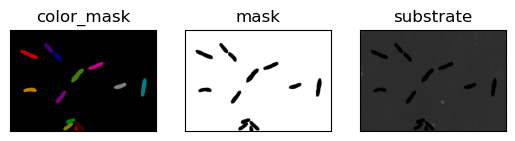

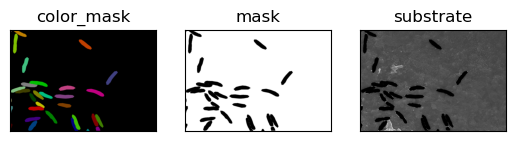

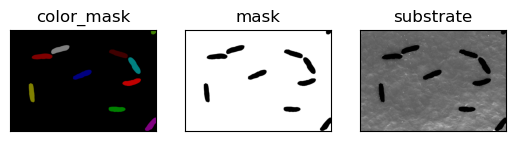

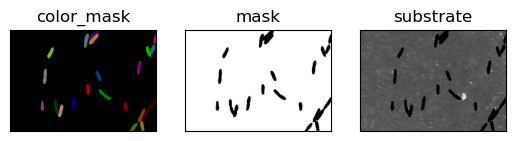

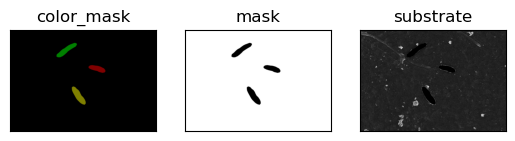

In [88]:
for i in range(5):
    color_mask = cv.imread(f"/usr/src/data/segmentation_object/valid_img_{i}.png")
    color_mask = cv.cvtColor(color_mask, cv.COLOR_BGR2RGB)

    gray_color_mask = cv.cvtColor(color_mask, cv.COLOR_BGR2GRAY)
    _, mask = cv.threshold(gray_color_mask, 0, 255, cv.THRESH_BINARY_INV)
    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    source = cv.imread(f"/usr/src/data/valid_bf_imgs_dir_png/valid_img_{i}.png")
    source = cv.cvtColor(source, cv.COLOR_BGR2RGB)

    substrate = cv.bitwise_and(source, mask)

    show_images(
        [color_mask, mask, substrate],
        cmap="gray",
        titles=["color_mask", "mask", "substrate"],
    )